In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import langdetect
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException

In [17]:
nationality = pd.read_csv("nationality.csv")
nationality.rename(columns={'auhtor_ID': 'author_ID'}, inplace=True)

In [18]:
print(nationality)

         author_ID                                               post  \
0        t2_10uons  It isn't, it's just for show. It isn't legally...   
1        t2_10uons  games won to games played. Games played is cal...   
2        t2_10uons  So with that logic USA is a very shitty place ...   
3        t2_10uons  are referring to It does add up a lot when EA,...   
4        t2_10uons  get another role than support Lel people here ...   
...            ...                                                ...   
82611  t2_57ogt82f  and Sergeant York. WWI didn't lend it'self to ...   
82612  t2_57ogt82f  a position where a person can get short term f...   
82613  t2_57ogt82f  you have to read the label. Some are just as h...   
82614  t2_57ogt82f  as traitors. Some suggesting it was treason. T...   
82615  t2_57ogt82f  for the drug trade staffed by benefit claimant...   

          nationality  
0             Finland  
1             Finland  
2             Finland  
3             Finland  
4  

In [19]:
nationality

,author_ID,post,nationality
0,t2_10uons,"It isn't, it's just for show. It isn't legally...",Finland
1,t2_10uons,games won to games played. Games played is cal...,Finland
2,t2_10uons,So with that logic USA is a very shitty place ...,Finland
3,t2_10uons,"are referring to It does add up a lot when EA,...",Finland
4,t2_10uons,get another role than support Lel people here ...,Finland
...,...,...,...
82611,t2_57ogt82f,and Sergeant York. WWI didn't lend it'self to ...,United Kingdom
82612,t2_57ogt82f,a position where a person can get short term f...,United Kingdom
82613,t2_57ogt82f,you have to read the label. Some are just as h...,United Kingdom
82614,t2_57ogt82f,as traitors. Some suggesting it was treason. T...,United Kingdom


In [21]:
# Dataset structure and basic information
print(nationality.info())

# First few rows
print(nationality.head())

# Missing values
print(nationality.isnull().sum())

# unique authors and nationalities
print(f"Number of unique authors: {nationality['author_ID'].nunique()}")
print(f"Number of unique nationalities: {nationality['nationality'].nunique()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82616 entries, 0 to 82615
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   author_ID    82616 non-null  object
 1   post         82616 non-null  object
 2   nationality  82616 non-null  object
dtypes: object(3)
memory usage: 1.9+ MB
None
   author_ID                                               post nationality
0  t2_10uons  It isn't, it's just for show. It isn't legally...     Finland
1  t2_10uons  games won to games played. Games played is cal...     Finland
2  t2_10uons  So with that logic USA is a very shitty place ...     Finland
3  t2_10uons  are referring to It does add up a lot when EA,...     Finland
4  t2_10uons  get another role than support Lel people here ...     Finland
author_ID      0
post           0
nationality    0
dtype: int64
Number of unique authors: 2363
Number of unique nationalities: 56


In [22]:
# Counting duplicate author IDs
duplicates = nationality['author_ID'].duplicated().sum()
print(f"Number of duplicate author_IDs: {duplicates}")

# Consistent formatting
nationality['nationality'] = nationality['nationality'].str.strip().str.lower()
print(nationality['nationality'].value_counts())

Number of duplicate author_IDs: 80253
nationality
germany                   12838
united kingdom             7861
usa                        7646
the netherlands            6905
sweden                     3364
finland                    3262
poland                     3031
france                     2869
italy                      2644
spain                      2441
ireland                    2328
belgium                    2284
romania                    2018
denmark                    1960
norway                     1801
czech republic             1490
portugal                   1379
greece                     1247
austria                    1213
canada                     1203
slovenia                   1191
hungary                    1188
turkey                     1160
russia                     1134
croatia                    1063
switzerland                1028
ukraine                     843
bulgaria                    669
estonia                     647
lithuania             

In [23]:
# Word count and character count columns
nationality['word_count'] = nationality['post'].apply(lambda x: len(str(x).split()))
nationality['char_count'] = nationality['post'].apply(lambda x: len(str(x)))

# Post summary statistics
print(nationality[['word_count', 'char_count']].describe())

# Empty or very short posts
short_posts = nationality[nationality['word_count'] <= 5]
print(f"Number of posts with 5 or fewer words: {short_posts.shape[0]}")


         word_count    char_count
count  82616.000000  82616.000000
mean    1485.151109   8425.224000
std      109.842381    767.671916
min      232.000000   1502.000000
25%     1500.000000   8220.000000
50%     1500.000000   8437.000000
75%     1500.000000   8688.000000
max     1500.000000  23644.000000
Number of posts with 5 or fewer words: 0


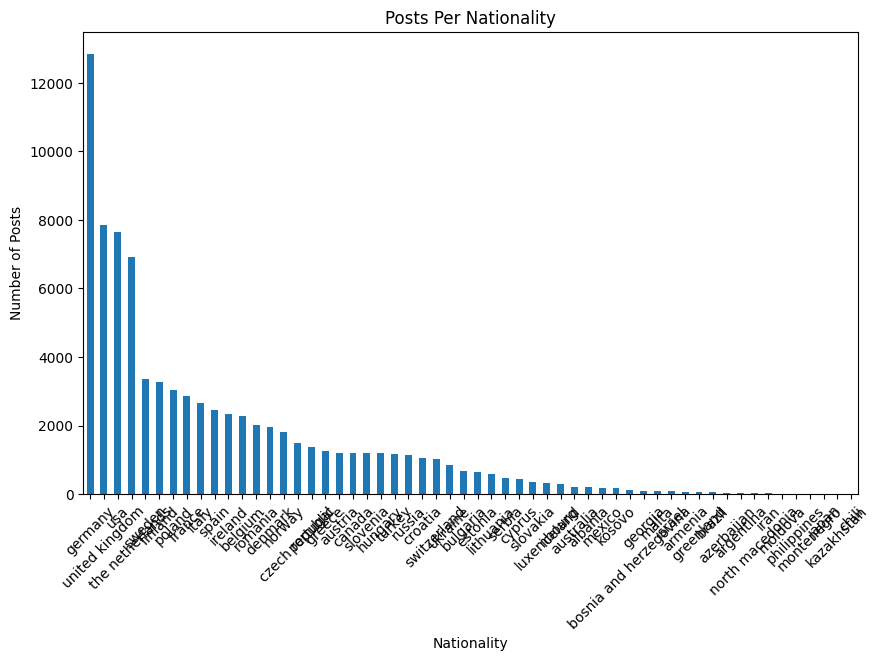

In [25]:
# Counting the posts for each nationality
nationality_counts = nationality['nationality'].value_counts()

# Plotting the nationality distribution!
nationality_counts.plot(kind='bar', title='Posts Per Nationality', figsize=(10, 6))
plt.ylabel('Number of Posts')
plt.xlabel('Nationality')
plt.xticks(rotation=45)
plt.show()

In [27]:
# Setting the seed for consistency
DetectorFactory.seed = 0

def detect_language(text):
    try:
        # Detecting the language of the post tex3t
        return detect(text)
    except LangDetectException:
        return 'unknown'

# Applying the function to the post column and creating a language column
nationality['language'] = nationality['post'].apply(detect_language)

In [28]:
language_counts = nationality['language'].value_counts()

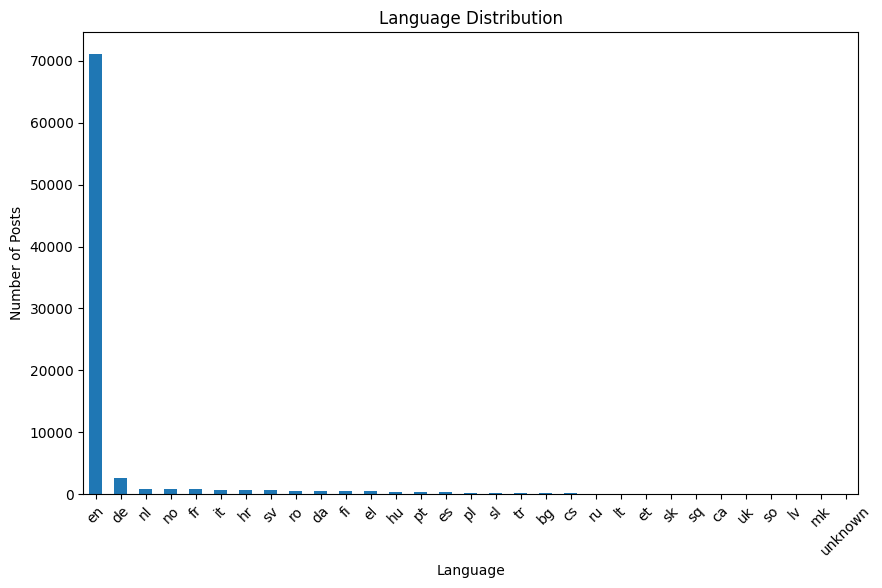

language
en         71051
de          2596
nl           922
no           815
fr           773
it           673
hr           667
sv           637
ro           593
da           552
fi           521
el           499
hu           348
pt           345
es           334
pl           272
sl           234
tr           228
bg           191
cs           151
ru            55
lt            49
et            39
sk            36
sq            14
ca            12
uk             5
so             1
lv             1
mk             1
unknown        1
Name: count, dtype: int64


In [30]:
language_counts.plot(kind='bar', title='Language Distribution', figsize=(10, 6))
plt.ylabel('Number of Posts')
plt.xlabel('Language')
plt.xticks(rotation=45)
plt.show()
print(language_counts)

In [32]:
nationality.to_csv("nationality_with_language.csv", index=False)